## **Implementing Linear Regression in Python**
Implementation of linear regression is not hard as you imagine. it is so easy for any beginner to implement it, he just need to apply the proper packages and their functions and classes.

### **Python Packages for Linear Regression**
- **NumPy** : The package NumPy is a fundamental Python scientific package that allows many high-performance operations on single- and multi-dimensional arrays. It also offers many mathematical routines. Of course, it’s open source.


- **scikit-learn** : The package scikit-learn is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classification, clustering, and more. Like NumPy, scikit-learn is also open source.

- **matplotlib.pyplot** : is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

- **pandas** : is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

### **Simple Linear Regression With scikit-learn**
We will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions.

Our case here that we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**There are five basic steps when you’re implementing linear regression :**

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.\

These steps are more or less general for most of the regression approaches and implementations.

#### **1. Import packages and classes**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
%matplotlib inline

#### **2. Provide data**

In [ ]:
source = "http://bit.ly/w-data"
data = pd.read_csv(source)
print("Data is loaded successfully")
data.head()

Data is loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data.\
**Our data set has 25 observations and of course  2 variables.**

##### **Visualizing Data set**
It is important point to analyze your data so let's plot our data points \
graphically to see if we can manually find any relationship between the data.

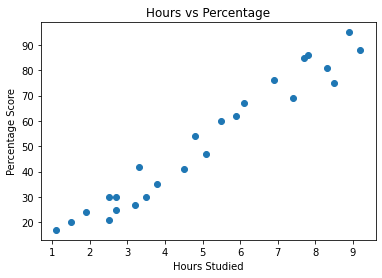

In [ ]:
# Plotting the distribution of scores
X = data.drop('Scores', axis=1).values
y = data['Scores'].values
# sns.heatmap(data.corr(), square=True)

plt.scatter(X, y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

**From the plot above, we can see that there is a positive linear relationship between the 2 variables.**

##### **Split data**

**It is good question to ask yourself should I split my data set? and why?** \

You split data into training and test sets to be able to obtain a realistic evaluation of your learned model. If you evaluate your learned model with the training data, you obtain an optimistic measure of the goodness of your model. So, you should use a separate set (a set that is not seen during training) to obtain a realistic evaluation of your model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

#### **3. Create a model and fit it**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Training is completed")

Training is completed


#### **4. Check the results**

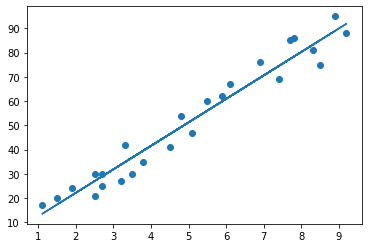

In [ ]:
# equation of y = a * x + b
line = model.coef_* X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

So the question of fitting is reduced to: how do we choose a and b? A common method is to define an error function for any given line and then to choose the line that minimizes the error function. Such an error function is also called a loss or a cost function. \

What will our loss function be? Intuitively, **we want the line to be as close to the actual data points as possible.** For this reason, we wish to minimize the vertical distance between the fit and the data. \

So for each data point, **we calculate the vertical distance between it and the line.** This distance is called a residual.

Now, we could try to minimize the sum of the residuals, but then a large positive residual would cancel out a large negative residual. **For this reason we minimize the sum of the squares of the residuals!**

#### **5. Apply prediction**

In [ ]:
y_pred = model.predict(X_test) # Predicting the scores

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


##### **Evaluation of model**

To evaluate the regression model there are metrics doing this mission, so let's talk about it. \

A common question by beginners to regression predictive modeling projects is:

**How do I calculate accuracy for my regression model ?** \

Accuracy (e.g. classification accuracy) is a measure for classification, not regression. \

We cannot calculate accuracy for a regression model. \

The performance of a regression model must be reported as an error in those predictions. \

This makes sense if you think about it. If you are predicting a numeric value like a height or a dollar amount, you don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values. \

Error addresses exactly this and summarizes on average how close predictions were to their expected values. \

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are: \

Mean Squared Error (MSE). \
Root Mean Squared Error (RMSE). \
Mean Absolute Error (MAE). \

So I will use 2 of these metrics to evaluate my model.

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Root Mean Squared Error: 4.352380006653288
Mean Absolute Error: 3.9207511902099244


from the output you can see that the error is not that bad for this simple data. 